In [3]:
import pandas as pd
import numpy as np
import math
df=pd.read_csv("/Users/mac/code/Sebban77/07-ML-Ops/01-Train-at-scale/data-train-at-scale/prelectureMLops/project/data/query_2009-01-01_2015-01-01_200k.csv")
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1
...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1


(array([  320., 62729.,     0., 13420.,     0.,  4068.,  1950.,     0.,
         6375.,  1881.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

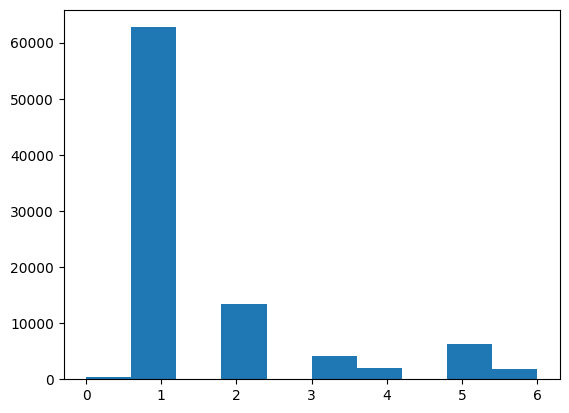

In [4]:
import matplotlib.pyplot as plt

plt.hist(df.passenger_count)

In [5]:
def passenger_scale(df):
    scaler = MinMaxScaler()
    df['passenger_count_scaled'] = scaler.fit_transform(df[['passenger_count']])
    return df
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in kilometers
    dlon = np.radians(lon2 - lon1)
    dlat = np.radians(lat2 - lat1)

    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
         np.sin(dlon / 2) ** 2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['is_day'] = df['pickup_datetime'].dt.hour.between(20, 7, inclusive='both').astype(int)
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)
df['passenger_count'] = df['passenger_count'].replace(0, np.nan)
df['distance_km'] = df['distance_km'].replace(0, np.nan)
df= df[df['fare_amount']< 100]
df= df[df['distance_km']< 40]
df= df[df['distance_km']> 0]
df= df[df['passenger_count']> 0]

df = df[['fare_amount', 'pickup_datetime','passenger_count', 'is_day', 'distance_km']]
print(" data shape", df.shape)

 data shape (87565, 5)


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# date time treatment
import datetime
def date_time_to_day(df):
    date = datetime.date(df['pickup_datetime'])
    day= date.weekday()
    return day

In [9]:
df

,fare_amount,pickup_datetime,passenger_count,is_day,distance_km
0,4.20,2009-01-01 01:14:44+00:00,1.0,0,0.370124
1,11.80,2009-01-01 03:51:05+00:00,2.0,0,4.661342
2,26.60,2009-01-01 04:23:00+00:00,1.0,0,13.348688
3,19.80,2009-01-01 04:49:52+00:00,2.0,0,5.244519
4,3.40,2009-01-01 05:04:41+00:00,1.0,0,0.375627
...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,1.0,0,3.236297
90739,9.50,2014-12-31 22:19:11+00:00,2.0,0,2.840641
90740,74.16,2014-12-31 22:26:27+00:00,2.0,0,26.132341
90741,8.50,2014-12-31 22:29:09+00:00,1.0,0,1.935664


In [10]:
df['day_name'] = df['pickup_datetime'].dt.weekday
df = df.drop( columns= 'pickup_datetime')

In [11]:
df

,fare_amount,passenger_count,is_day,distance_km,day_name
0,4.20,1.0,0,0.370124,3
1,11.80,2.0,0,4.661342,3
2,26.60,1.0,0,13.348688,3
3,19.80,2.0,0,5.244519,3
4,3.40,1.0,0,0.375627,3
...,...,...,...,...,...
90738,14.50,1.0,0,3.236297,2
90739,9.50,2.0,0,2.840641,2
90740,74.16,2.0,0,26.132341,2
90741,8.50,1.0,0,1.935664,2


(array([11206., 12358.,     0., 12637.,     0., 13022., 13494.,     0.,
        13346., 11502.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

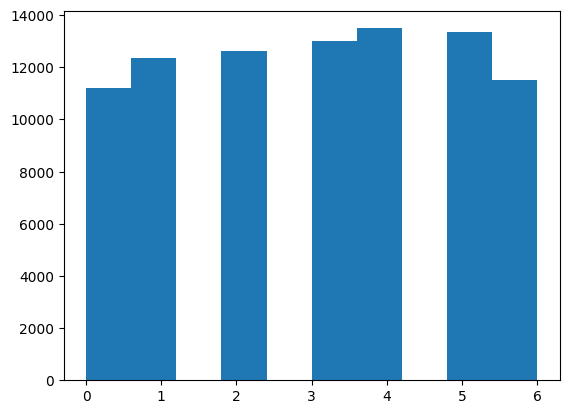

In [12]:
plt.hist(df['day_name'])

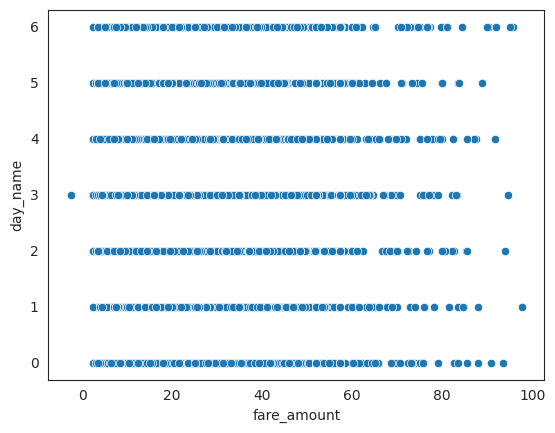

In [13]:
import seaborn as sns
with sns.axes_style("white"):
    sns.scatterplot(x='fare_amount', y='day_name', data=df)


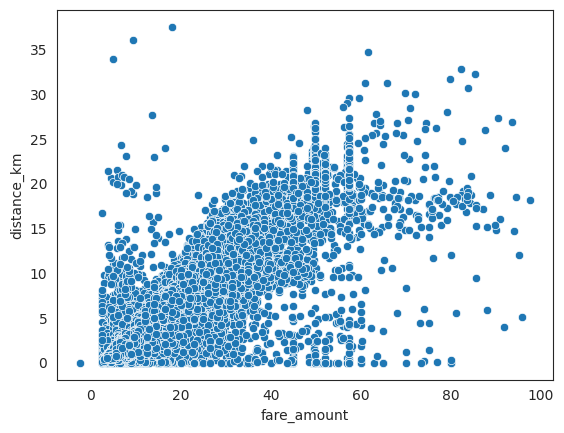

In [14]:
with sns.axes_style("white"):
    sns.scatterplot(x='fare_amount', y='distance_km', data=df)

In [15]:
df

,fare_amount,passenger_count,is_day,distance_km,day_name
0,4.20,1.0,0,0.370124,3
1,11.80,2.0,0,4.661342,3
2,26.60,1.0,0,13.348688,3
3,19.80,2.0,0,5.244519,3
4,3.40,1.0,0,0.375627,3
...,...,...,...,...,...
90738,14.50,1.0,0,3.236297,2
90739,9.50,2.0,0,2.840641,2
90740,74.16,2.0,0,26.132341,2
90741,8.50,1.0,0,1.935664,2


<Axes: >

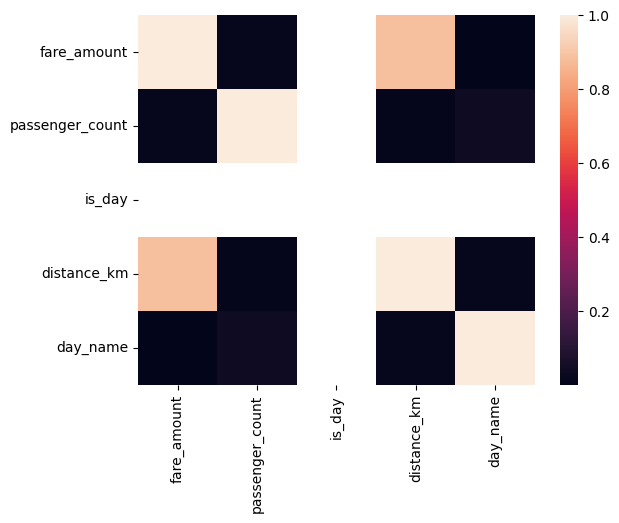

In [16]:
sns.heatmap(df.corr())

In [17]:
from sklearn.model_selection import train_test_split
X = df[['distance_km', 'passenger_count', 'is_day']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers, Sequential

def initiate_compile_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_dim=3)) # highly recommend this option
    model.add(layers.Dense(10, activation='relu'))
    #model.add(layers.Dense(7, activation='tanh'))# instead of input_dim = 13
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mae'])
    return model

def train(model, X_train, y_train):

        model = initiate_compile_model()
        es = EarlyStopping(patience =10,restore_best_weights = True)
        history = model.fit(X_train,y_train,validation_split = 0.3,
        shuffle = True,
        batch_size = 32,
        epochs = 100,
        callbacks = [es],
        verbose = 0
        )
        return model, history

In [27]:
model = initiate_compile_model()
model, history = train(model, X_train,y_train)
res = model.evaluate(X_test, y_test)[1]

/Users/mac/.pyenv/versions/3.11.9/envs/Taxifare_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 18.3209 - mae: 2.3212


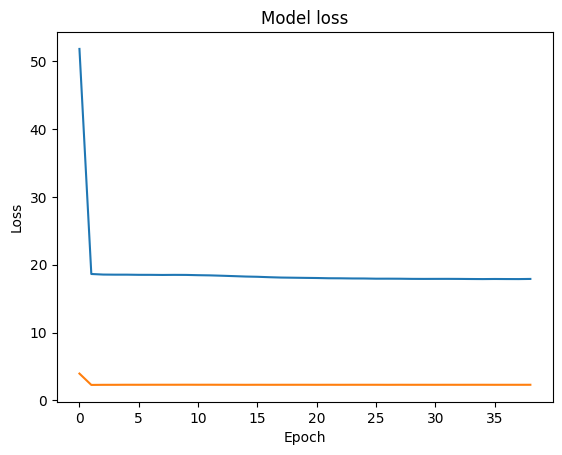

In [41]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['mae'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_history(history)

In [46]:
model.summary()
X= [1,0,1,3]
y = model.predict(X)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

ValueError: Unrecognized data type: x=[1, 0, 1, 3] (of type <class 'list'>)